In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Let's start by importing some data we downloaded from Bloomberg 

In [28]:
tickers = pd.read_csv("C:/Users/anasf/Desktop/Temporary Files/ETF.csv",index_col=0,parse_dates=["Dates"])
tickers 

VDC US Equity  VPU US Equity  VHT US Equity  VGT US Equity  \
Dates                                                                    
2010-01-01         65.690          65.18          54.19        54.8700   
2010-01-04         66.360          65.47          54.94        55.8000   
2010-01-05         66.420          64.86          54.60        55.7400   
2010-01-06         66.410          65.15          54.91        55.3500   
2010-01-07         66.410          64.86          55.10        55.1400   
...                   ...            ...            ...            ...   
2020-05-08        147.950         123.79         189.26       251.4100   
2020-05-11        147.550         123.03         193.06       253.1400   
2020-05-12        146.290         121.70         190.00       247.7000   
2020-05-13        145.060         120.51         187.53       243.3000   
2020-05-14        142.734         119.04         186.62       241.7927   

            VOX US Equity  VCR US Equity  VNQ US Equity  VAW US Equity  \
Dates                                                                    
2010-01-01        56.5100         46.770          44.74        67.8200   
2010-01-04        57.7200         47.140          44.55        69.8700   
2010-01-05        58.1100         47.440          44.50        70.2900   
2010-01-06        57.1900         47.490          44.42        71.2800   
2010-01-07        56.9800         47.900          44.90        70.9700   
...                   ...            ...            ...            ...   
2020-05-08        89.4900        179.310          74.99       112.4100   
2020-05-11        89.5200        178.930          73.90       110.6600   
2020-05-12        87.6900        174.850          70.54       108.6200   
2020-05-13        85.9800        171.710          68.83       105.8000   
2020-05-14        85.3798        170.824          67.79       105.3464   

            VIS US Equity  VFH US Equity  ...  TIPS LN Equity  TLT US Equity  \
Dates                                     ...                                  
2010-01-01        51.5800          29.04  ...             NaN          89.89   
2010-01-04        52.5400          29.57  ...             NaN          89.81   
2010-01-05        52.7700          29.90  ...             NaN          90.39   
2010-01-06        52.9000          29.95  ...             NaN          89.18   
2010-01-07        53.5500          30.53  ...             NaN          89.33   
...                   ...            ...  ...             ...            ...   
2020-05-08       119.3900          54.78  ...          32.870         163.98   
2020-05-11       117.8600          53.61  ...          32.955         162.70   
2020-05-12       114.3000          52.05  ...          32.905         164.37   
2020-05-13       111.0900          50.26  ...          32.965         165.52   
2020-05-14       109.7199          50.49  ...          33.100         167.91   

            IEF US Equity  GOVT US Equity  PCY US Equity  EMB US Equity  \
Dates                                                                     
2010-01-01          88.60             NaN        25.5300         101.78   
2010-01-04          88.82             NaN        25.4601         101.93   
2010-01-05          89.21             NaN        25.5900         102.55   
2010-01-06          88.85             NaN        25.7000         102.69   
2010-01-07          88.85             NaN        25.6200         102.16   
...                   ...             ...            ...            ...   
2020-05-08         121.53           27.96        24.8100         101.65   
2020-05-11         121.19           27.89        24.9300         102.21   
2020-05-12         121.59           27.97        24.8700         102.02   
2020-05-13         121.84           28.03        24.7400         101.41   
2020-05-14         122.17           28.14        24.6100         101.02   

            AGG US Equity  SLV US Equity  GLD US Equity  GSG US Equit

In [29]:
#transform the prices to returns and drop missing values 
returns = tickers.pct_change().dropna()
returns

VDC US Equity  VPU US Equity  VHT US Equity  VGT US Equity  \
Dates                                                                    
2015-12-07       0.002942       0.002504      -0.008074      -0.006459   
2015-12-08      -0.002933      -0.000869       0.003423      -0.001692   
2015-12-09      -0.008826       0.000000      -0.010537      -0.014987   
2015-12-10       0.000312      -0.015431       0.007892       0.002355   
2015-12-11      -0.011322      -0.003642      -0.016572      -0.020871   
...                   ...            ...            ...            ...   
2020-05-08       0.024159       0.021960       0.006167       0.014814   
2020-05-11      -0.002704      -0.006139       0.020078       0.006881   
2020-05-12      -0.008539      -0.010810      -0.015850      -0.021490   
2020-05-13      -0.008408      -0.009778      -0.013000      -0.017763   
2020-05-14      -0.016035      -0.012198      -0.004853      -0.006195   

            VOX US Equity  VCR US Equity  VNQ US Equity  VAW US Equity  \
Dates                                                                    
2015-12-07       0.001175      -0.003862      -0.002782      -0.017729   
2015-12-08      -0.001291      -0.003639      -0.000888      -0.018049   
2015-12-09      -0.012577      -0.011752      -0.005584       0.021410   
2015-12-10       0.000356       0.003375      -0.007147      -0.005419   
2015-12-11      -0.024515      -0.022197      -0.001799      -0.024468   
...                   ...            ...            ...            ...   
2020-05-08       0.016585       0.024160       0.023754       0.028078   
2020-05-11       0.000335      -0.002119      -0.014535      -0.015568   
2020-05-12      -0.020442      -0.022802      -0.045467      -0.018435   
2020-05-13      -0.019501      -0.017958      -0.024242      -0.025962   
2020-05-14      -0.006981      -0.005160      -0.015110      -0.004287   

            VIS US Equity  VFH US Equity  ...  TIPS LN Equity  TLT US Equity  \
Dates                                     ...                                  
2015-12-07      -0.006158      -0.008342  ...        0.000502       0.009703   
2015-12-08      -0.014977      -0.012217  ...        0.000334       0.000493   
2015-12-09      -0.004611      -0.010949  ...       -0.003343      -0.001067   
2015-12-10       0.005125      -0.000205  ...       -0.001006       0.001315   
2015-12-11      -0.017845      -0.019889  ...        0.001511       0.015758   
...                   ...            ...  ...             ...            ...   
2020-05-08       0.027364       0.025267  ...        0.000000      -0.013001   
2020-05-11      -0.012815      -0.021358  ...        0.002586      -0.007806   
2020-05-12      -0.030205      -0.029099  ...       -0.001517       0.010264   
2020-05-13      -0.028084      -0.034390  ...        0.001823       0.006996   
2020-05-14      -0.012333       0.004576  ...        0.004095       0.014439   

            IEF US Equity  GOVT US Equity  PCY US Equity  EMB US Equity  \
Dates                                                                     
2015-12-07       0.003215        0.002393      -0.001443      -0.002422   
2015-12-08       0.000565        0.001194      -0.002168      -0.001588   
2015-12-09       0.001507       -0.000795       0.002534       0.001684   
2015-12-10      -0.002163        0.000000      -0.001806      -0.001494   
2015-12-11       0.008011        0.005569      -0.013025      -0.015337   
...                   ...             ...            ...            ...   
2020-05-08      -0.003281       -0.003209       0.001211       0.005142   
2020-05-11      -0.002798       -0.002504       0.004837       0.005509   
2020-05-12       0.003301        0.002868      -0.002407      -0.001859   
2020-05-13       0.002056        0.002145      -0.005227      -0.005979   
2020-05-14       0.002708        0.003924      -0.005255      -0.003846   

            AGG US Equity  SLV US Equity  GLD US Equity  GSG US Equit

Let's start exploring this dataset by looking at some basic statistics for our returns. 

In [30]:
returns.describe()

VDC US Equity  VPU US Equity  VHT US Equity  VGT US Equity  \
count    1159.000000    1159.000000    1159.000000    1159.000000   
mean        0.000137       0.000308       0.000366       0.000763   
std         0.010078       0.013017       0.011845       0.014537   
min        -0.093441      -0.112256      -0.110531      -0.134863   
25%        -0.003387      -0.004089      -0.004068      -0.003800   
50%         0.000071       0.000646       0.000387       0.001017   
75%         0.004480       0.005340       0.005725       0.006571   
max         0.090395       0.130051       0.079165       0.110140   

       VOX US Equity  VCR US Equity  VNQ US Equity  VAW US Equity  \
count    1159.000000    1159.000000    1159.000000    1159.000000   
mean        0.000083       0.000336      -0.000036       0.000147   
std         0.012607       0.012504       0.013749       0.013837   
min        -0.114196      -0.130318      -0.177277      -0.110705   
25%        -0.005209      -0.003959      -0.004705      -0.005486   
50%         0.000000       0.000777       0.000362       0.000335   
75%         0.006066       0.005468       0.005755       0.006417   
max         0.087459       0.092098       0.089967       0.118297   

       VIS US Equity  VFH US Equity  ...  TIPS LN Equity  TLT US Equity  \
count    1159.000000    1159.000000  ...     1159.000000    1159.000000   
mean        0.000135       0.000118  ...        0.000096       0.000323   
std         0.013376       0.015127  ...        0.004120       0.008685   
min        -0.114612      -0.136898  ...       -0.033879      -0.066683   
25%        -0.004093      -0.004640  ...       -0.001467      -0.004244   
50%         0.000496       0.000282  ...        0.000000       0.000325   
75%         0.005727       0.006043  ...        0.001799       0.004559   
max         0.119037       0.124533  ...        0.054445       0.075196   

       IEF US Equity  GOVT US Equity  PCY US Equity  EMB US Equity  \
count    1159.000000     1159.000000    1159.000000    1159.000000   
mean        0.000130        0.000103      -0.000070      -0.000031   
std         0.003462        0.002705       0.007993       0.006408   
min        -0.025073       -0.022246      -0.125163      -0.092160   
25%        -0.001911       -0.001409      -0.002082      -0.001884   
50%         0.000000        0.000000       0.000000       0.000094   
75%         0.002054        0.001559       0.002424       0.002265   
max         0.026417        0.022576       0.054722       0.040127   

       AGG US Equity  SLV US Equity  GLD US Equity  GSG US Equity  
count    1159.000000    1159.000000    1159.000000    1159.000000  
mean        0.000071       0.000141       0.000421      -0.000378  
std         0.002994       0.013513       0.008291       0.013659  
min        -0.040010      -0.123448      -0.039888      -0.120811  
25%        -0.001074      -0.006205      -0.004053      -0.006973  
50%         0.000092       0.000000       0.000352       0.000000  
75%         0.001294       0.006824       0.004505       0.006285  
max         0.023721       0.079610       0.049122       0.067774  

[8 rows x 38 columns]

The summary statistics above don't seem to be really helpful in helping us understand the differences. Maybe visual exploration will be better. 

We will begin by calculating some basic performance and risk measures for the ETFs we have but before we do that let's see how how the distribution of the returns looks like for each of these ETFs. We plot the daily returns boxplots for each security and notice the presence of extreme outliers highlighting that the distribution of returns deviates from the normal around the tails. There is a rich literature discussing higlighting the non-normallity of stock returns. Daily returns are a particularly extreme example of that given their granularity. If we used weekly or monthly returns, the distribution will start approaching a normal one.     
 

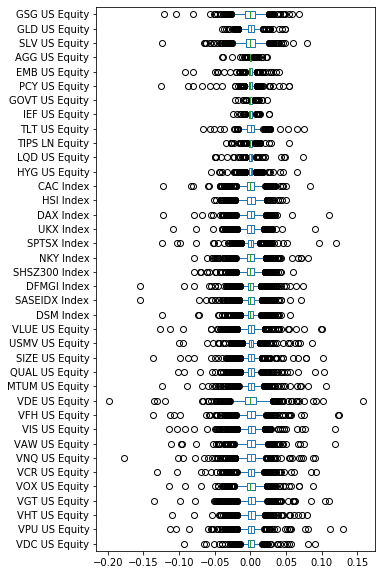

In [31]:
returns.plot.box(figsize=(5,10), vert=False)

If we take the VDE US Equity ETF daily returns for example and plot their QQ plot, we can see this behavior better. We notice how the distribution significantly deviates from the normal distribution around the tails. What this means is that if we assume a normal distribution for VDE US Equity daily returns, we will significantly underestimate the probability of observing those tail observations which of course can be costly particularly on the left side of the tail.     

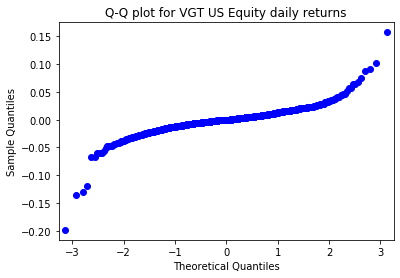

In [32]:
sm.qqplot(returns["VDE US Equity"])
plt.title("Q-Q plot for VGT US Equity daily returns")
plt.show()


We can clearly tell now that distribution of our daily returns is far from the normal distribution. We can try to characterize these differences from the normal in terms of kurtosis and skewness. We know that the skewnees of the normal distribution is 0 and its Kurtosis is 3. Negative skewness for one of our ETFs means that we have a higher probabliltiy of observing returns lower than the mean than higher than the mean. Kurtosis above 3 means we have a higher probability of oberserving higher/lower returns around the mean compared to that of a normal distribution. 

ETFs Skewness 

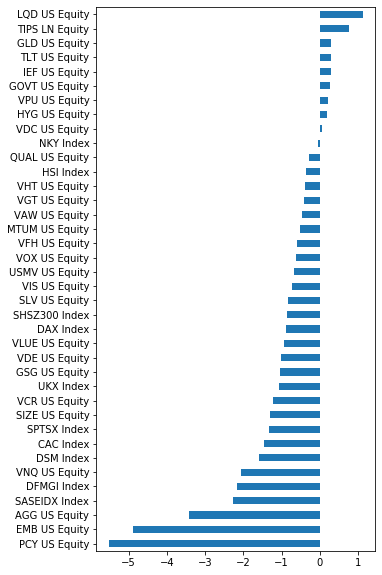

In [78]:
returns.skew().sort_values(ascending=True).plot.barh(figsize=(5,10))

ETFs Kurtosis

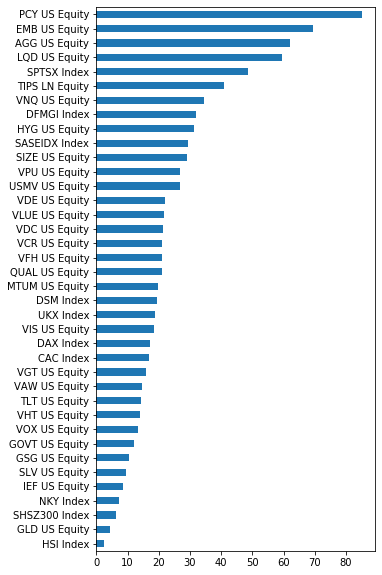

In [79]:
returns.kurtosis().sort_values(ascending=True).plot.barh(figsize=(5,10))

### Let's start by calculating the annualized variance and volatility of our assets

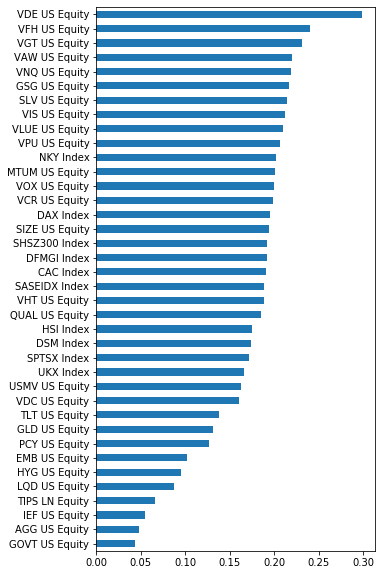

In [33]:
#risk measures of variance and volatility
annualized_volatility = returns.std().sort_values(ascending=False)*np.sqrt(252)
annualized_variance = returns.var().sort_values(ascending=False)*np.sqrt(252)
risk = pd.DataFrame({"Variance": annualized_variance
                     ,
                    "Volatility": annualized_volatility
                    })
risk["Volatility"].sort_values(ascending=True).plot.barh(figsize=(5,10))

VDE US Equity (Energy Sector ETF) exhibits high volatility due to the CoVID-19 pandemic and the crash in oil prices that are pushing sector constituents to bankruptcy. The least volatile ETF is the GOVT US Equity ETF which primarly holds U.S treasuries with maturies ranging from 1 to 30 years. 

Let's compute the maximum drawdown for each of our ETFs over the period we have in our data  

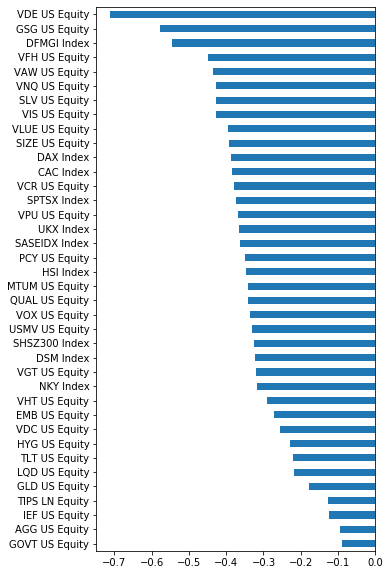

In [39]:
wealth_index = 100*(1 + returns).cumprod()
previous_peak = wealth_index.cummax()
drawdown = (wealth_index - previous_peak) / previous_peak
drawdown.min().sort_values(ascending=False).plot.barh(figsize=(5,10))

Let's visually compare the historical drawdown charts of the ETF with the largest drawdown, VDE US Equity and the ETF with the lowest maximum drawdown, GOVT US Equity. 

Text(0, 0.5, 'Drawdown')

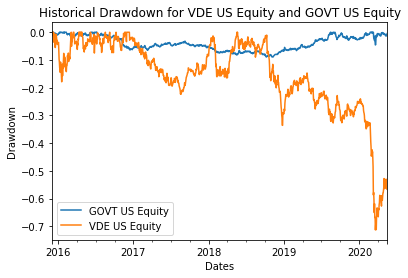

In [52]:
drawdown[["GOVT US Equity", "VDE US Equity"]].plot.line()
plt.title("Historical Drawdown for VDE US Equity and GOVT US Equity")
plt.ylabel("Drawdown")

Let's see if there is a relationship between the volatility and drawdown. We would expect to see that instruments with a high volatility exhibit also high maximum drawdown (High negative value) and vice versa 

Text(0, 0.5, 'Maximum Drawdown')

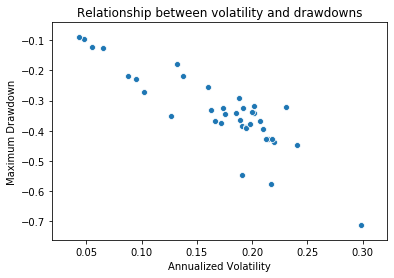

In [65]:
sns.scatterplot(annualized_volatility,drawdown.min())
plt.title("Relationship between volatility and drawdowns")
plt.xlabel("Annualized Volatility")
plt.ylabel("Maximum Drawdown")

## Let's calculate the annualized returns from the daily returns 

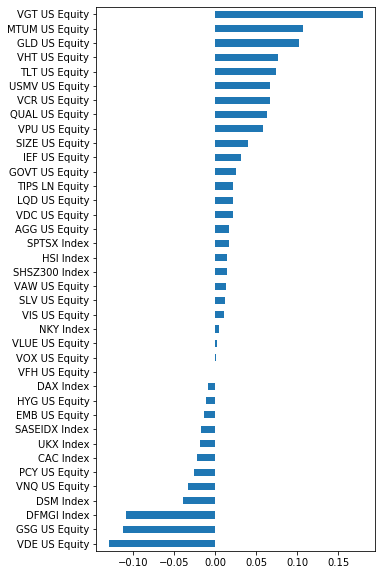

In [34]:
#return measures 
n_days = returns.shape[0]
daily_returns = ((returns + 1).prod()**(1/n_days)) - 1
annualized_returns = (daily_returns + 1)**252 - 1
annualized_returns.sort_values(ascending=True).plot.barh(figsize=(5,10))

## We calculate the sharpe ratio of each security 

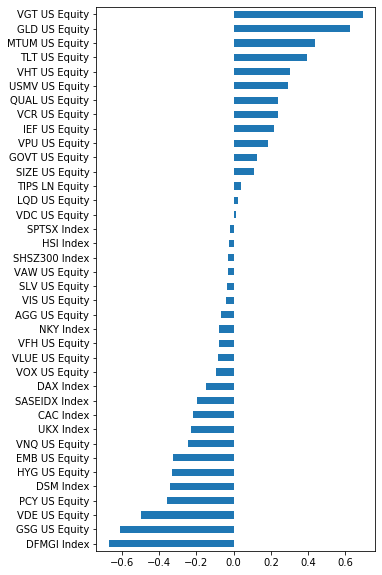

In [35]:
#sharpe ratio 
ticker_sharpe_ratio = (annualized_returns - 0.02) / annualized_volatility
ticker_sharpe_ratio.sort_values(ascending=True).plot.barh(figsize=(5,10))

Technology (VGT US Equity), Gold (GLD US Equity), Momentum (MTUM US Equity) and long dated treasuries (TLT US Equity) have the highest risk adjusted returns as measured by the sharpe ration, assuming a risk free rate of 2%. 

Dubai Index (DFMGI Index), Commodities (GSG US Equity), Energy (VDE US Equity) and Emerging markets (PCY US Equity) have the worst risk adjusted returns  

### Let's produce a correlation matrix of for the asset returns to see if we can identify negatively correlated assets that we can use in building resilient portfolios. 

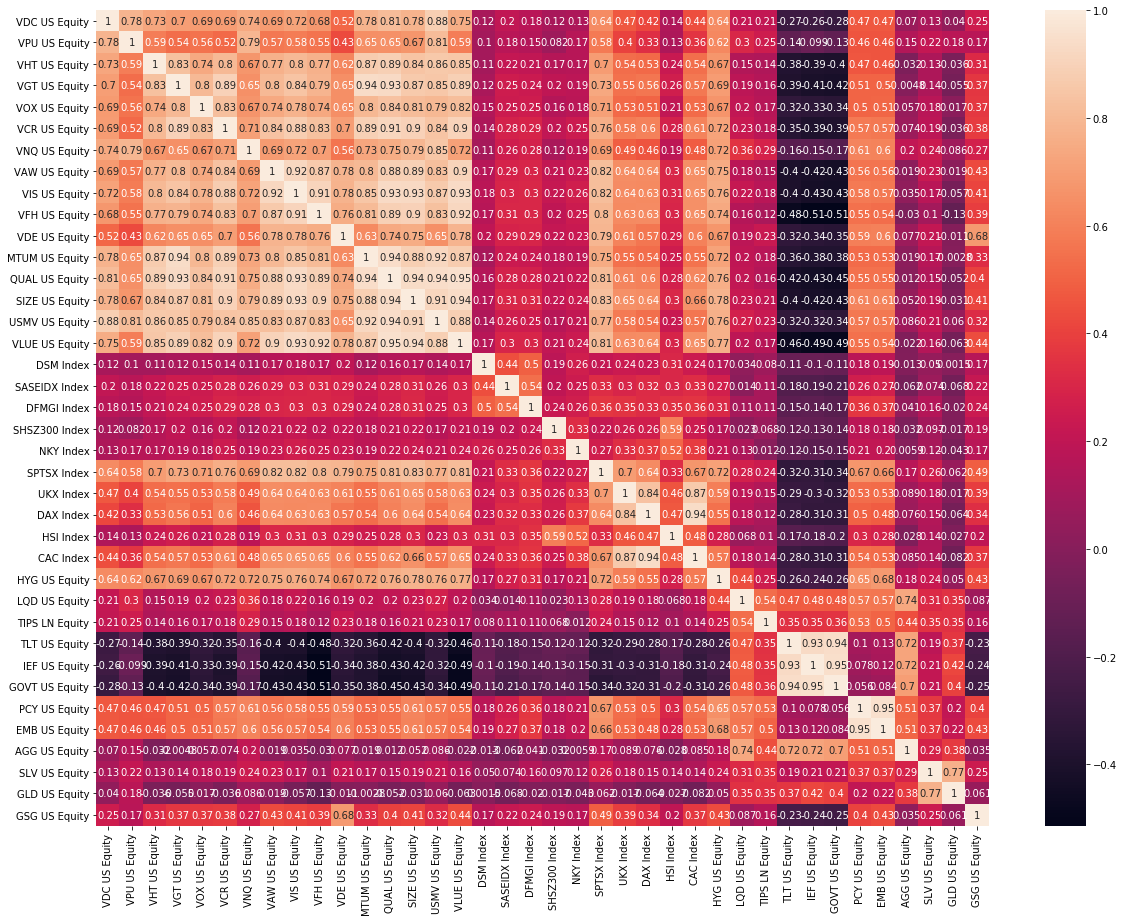

In [36]:
#Correlation matrix of all the assets
plt.subplots(figsize=(20,15))
sns.heatmap(returns.corr(),annot=True)

From the heatmap above (correlation matrix), we notice a negative relationship between the TLT, IEF and GOVT etfs and most of the sector equity ETFs. It's an expected negative relationship as TLT, IEF and GOVT are bond ETFs and safer assets to which investors allocate more money in times of equity market stress or drawdown.   

### Let's see what sort of relationship is in place between the annualized return and annualized volatility 

Text(0, 0.5, 'Annualized return')

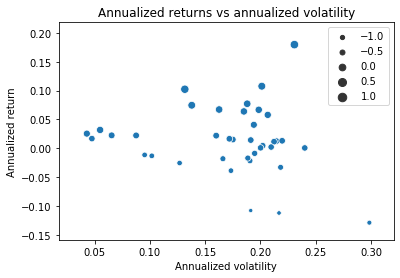

In [38]:
sns.scatterplot(annualized_volatility,annualized_returns,size=ticker_sharpe_ratio)
plt.title("Annualized returns vs annualized volatility")
plt.xlabel("Annualized volatility")
plt.ylabel("Annualized return")

In [74]:
returns.kurt().sort_values(ascending=True)

HSI Index          2.428379
GLD US Equity      4.520071
SHSZ300 Index      6.447656
NKY Index          7.178722
IEF US Equity      8.701710
SLV US Equity      9.440161
GSG US Equity     10.424509
GOVT US Equity    12.160961
VOX US Equity     13.342256
VHT US Equity     14.057421
TLT US Equity     14.296411
VAW US Equity     14.752045
VGT US Equity     16.024631
CAC Index         16.870259
DAX Index         17.218225
VIS US Equity     18.626736
UKX Index         18.896972
DSM Index         19.433415
MTUM US Equity    19.721199
QUAL US Equity    20.966768
VFH US Equity     21.060080
VCR US Equity     21.167075
VDC US Equity     21.442350
VLUE US Equity    21.774333
VDE US Equity     21.879069
USMV US Equity    26.716700
VPU US Equity     26.730228
SIZE US Equity    29.200353
SASEIDX Index     29.410631
HYG US Equity     31.313626
DFMGI Index       31.842757
VNQ US Equity     34.522368
TIPS LN Equity    40.976238
SPTSX Index       48.495122
LQD US Equity     59.339170
AGG US Equity     62

In [75]:
returns.skew().sort_values(ascending=True)

PCY US Equity    -5.511949
EMB US Equity    -4.894075
AGG US Equity    -3.416439
SASEIDX Index    -2.273410
DFMGI Index      -2.174083
VNQ US Equity    -2.065308
DSM Index        -1.595394
CAC Index        -1.445689
SPTSX Index      -1.316322
SIZE US Equity   -1.295963
VCR US Equity    -1.228710
UKX Index        -1.070256
GSG US Equity    -1.040801
VDE US Equity    -1.025804
VLUE US Equity   -0.922706
DAX Index        -0.871120
SHSZ300 Index    -0.852304
SLV US Equity    -0.829290
VIS US Equity    -0.723252
USMV US Equity   -0.663515
VOX US Equity    -0.623381
VFH US Equity    -0.599517
MTUM US Equity   -0.520712
VAW US Equity    -0.462690
VGT US Equity    -0.409444
VHT US Equity    -0.391592
HSI Index        -0.358720
QUAL US Equity   -0.271444
NKY Index        -0.046268
VDC US Equity     0.060773
HYG US Equity     0.194322
VPU US Equity     0.208892
GOVT US Equity    0.263166
IEF US Equity     0.281875
TLT US Equity     0.282138
GLD US Equity     0.291733
TIPS LN Equity    0.754842
L